# 군집화 Clustring
## K-means
데이터를 k개의 그룹으로 군집화.
각 데이터들로부터 이들이 속한 클러스터의 중심점(centroid)까지의 평균 거리를 계산

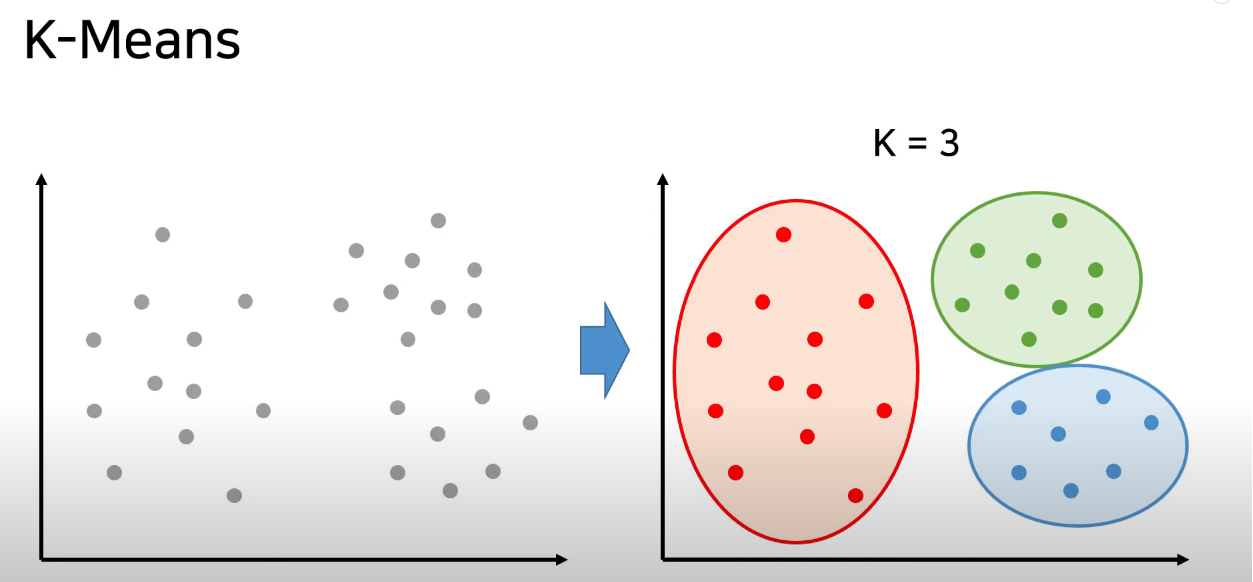

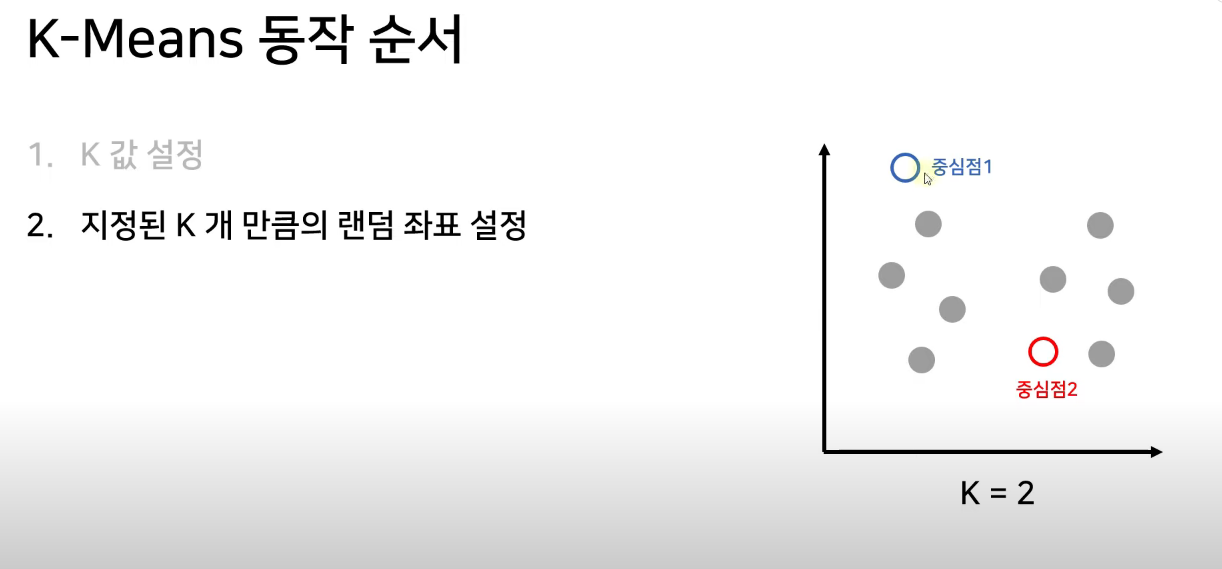

아무데나 초기 centroid 잡고

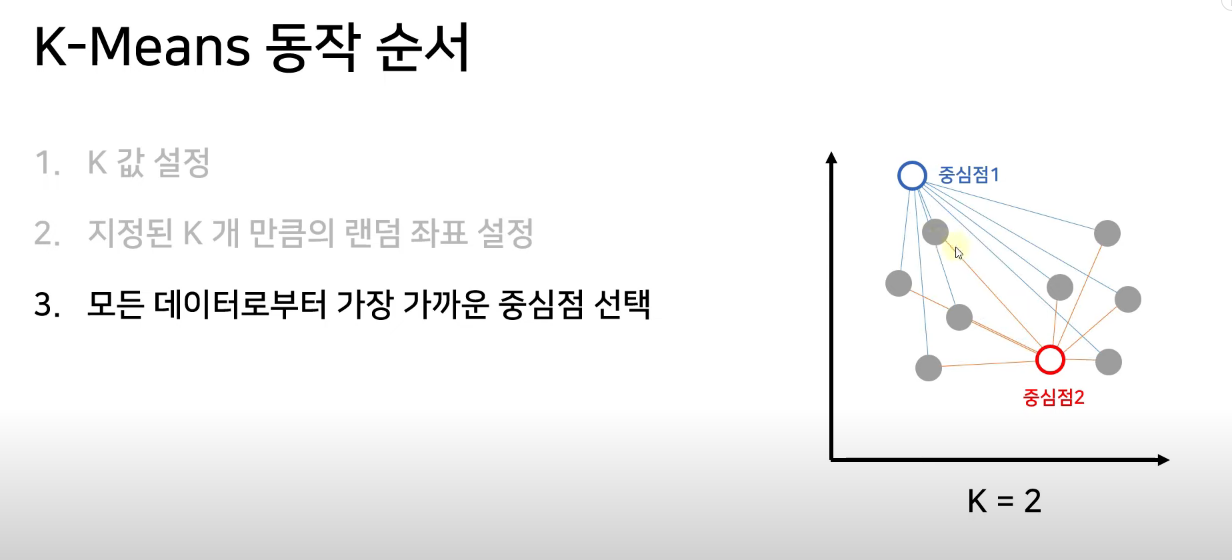

모든 데이터에대해 어느 중심점과 더 가까운지 비교

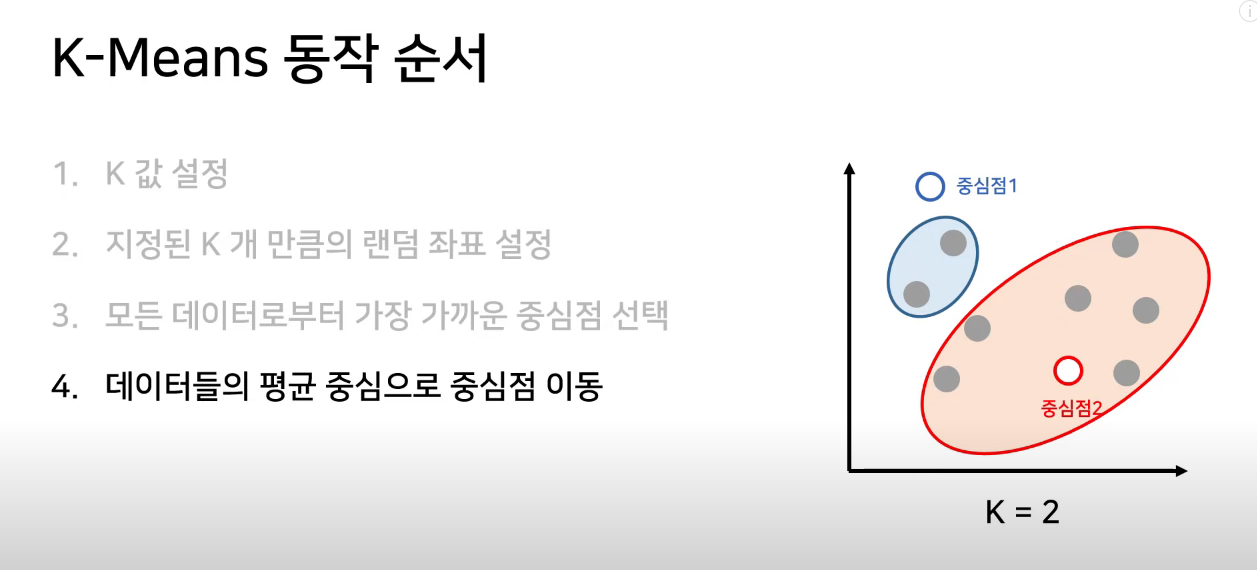

군집2개로 나눠졌으면 중심점 이동!

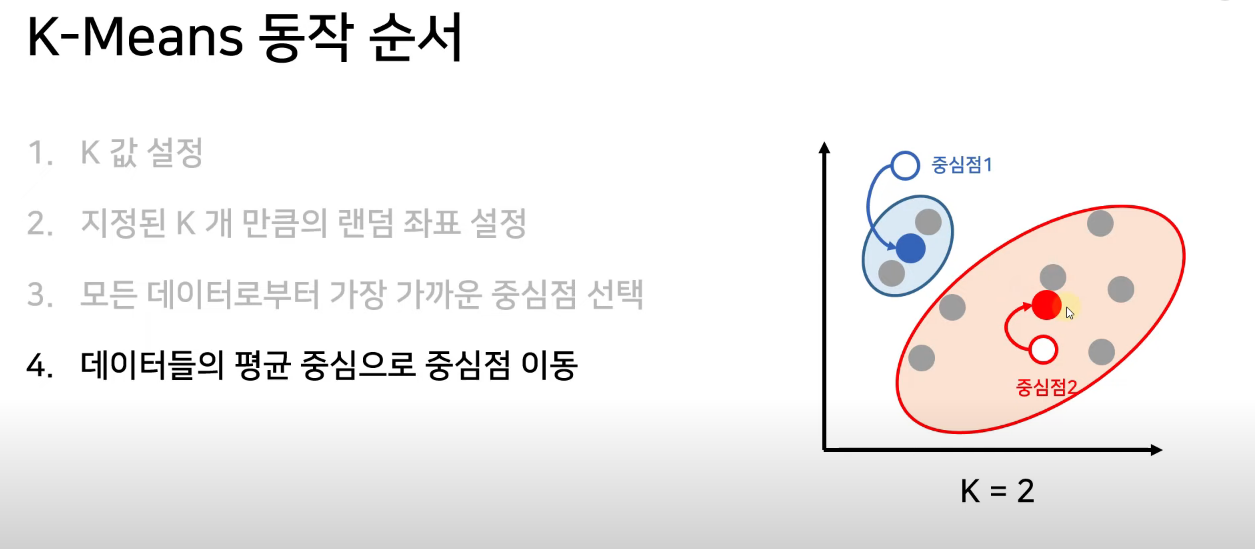

중심점이 더이상 움직이지 않을때까지 이과정 반복

# K-means단점
Random Initialization Trap 중심정 무작위 선정 문제
- k-means방법은 초기 centroid설정에 매우 민감하다.
왜냐하면 초기에 어디에 centroid를 잡는지 따라 결과가 바뀔수도있고, 원치않는 이상한 결과가 나올수도있다.
centroid끼리의거리가 너무 가까워도 결과가 이상해질 수 있다.

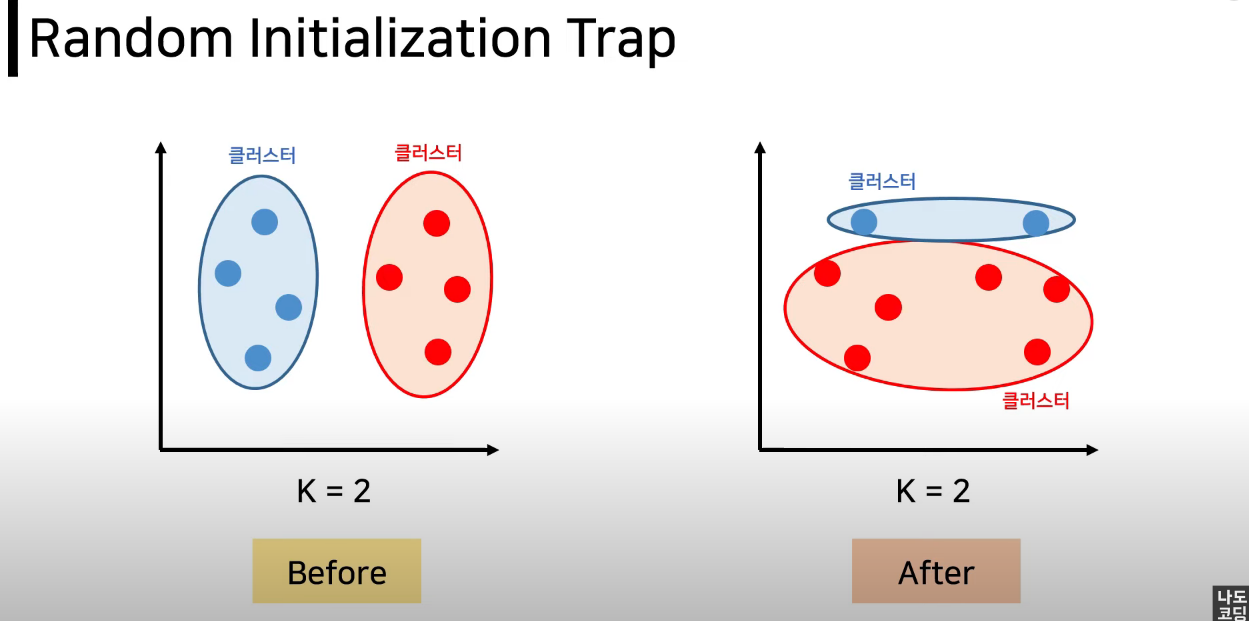

# 해결책! K-means++으로 초기centroid 잘잡기!

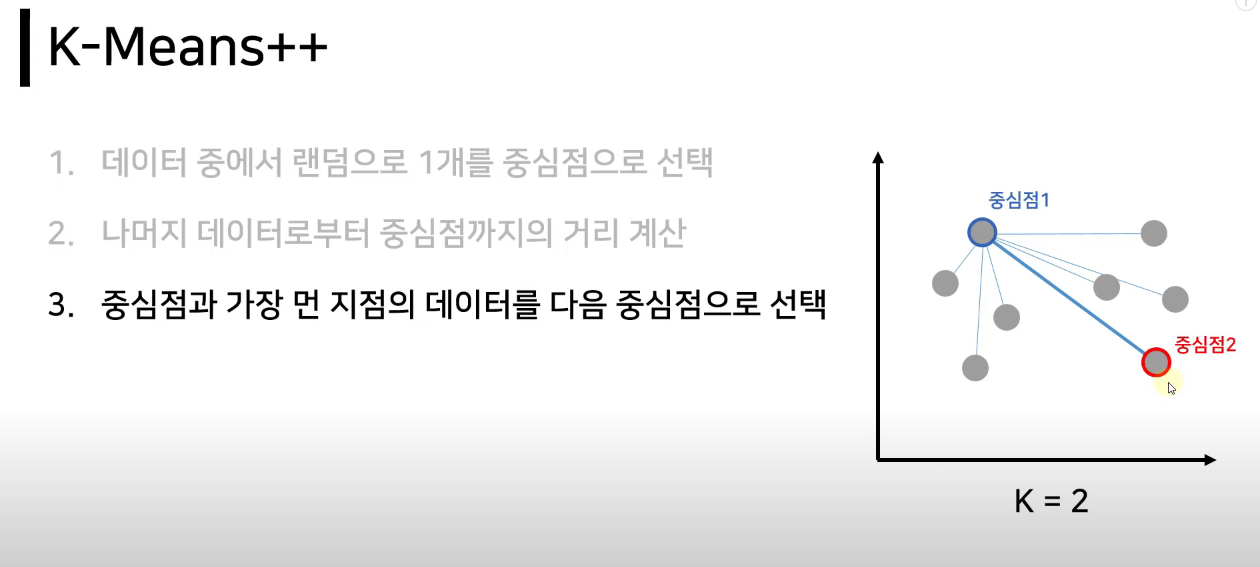

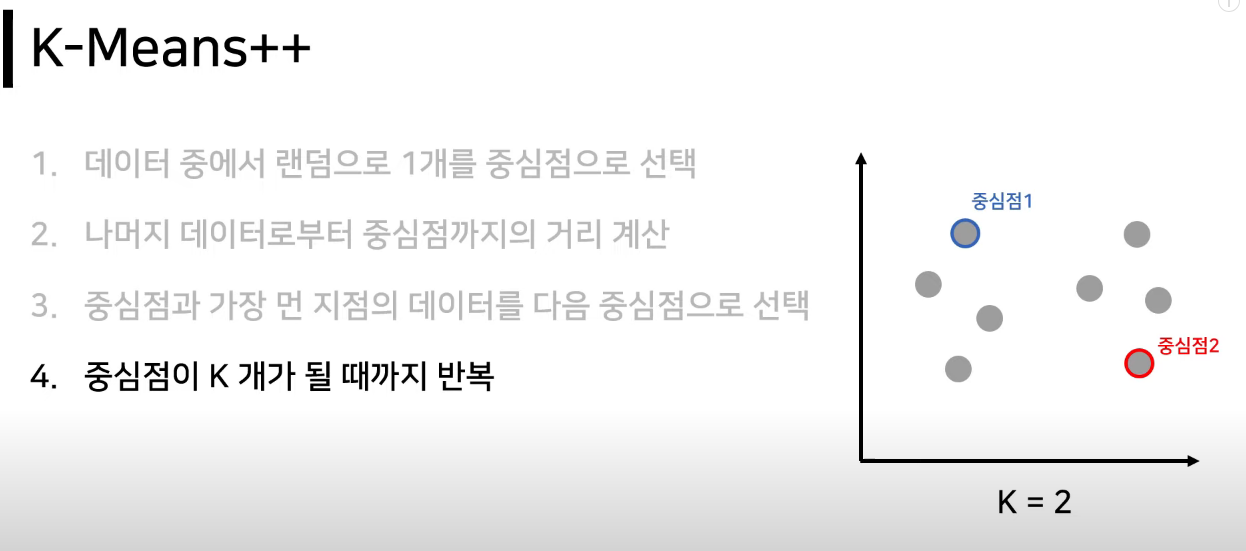

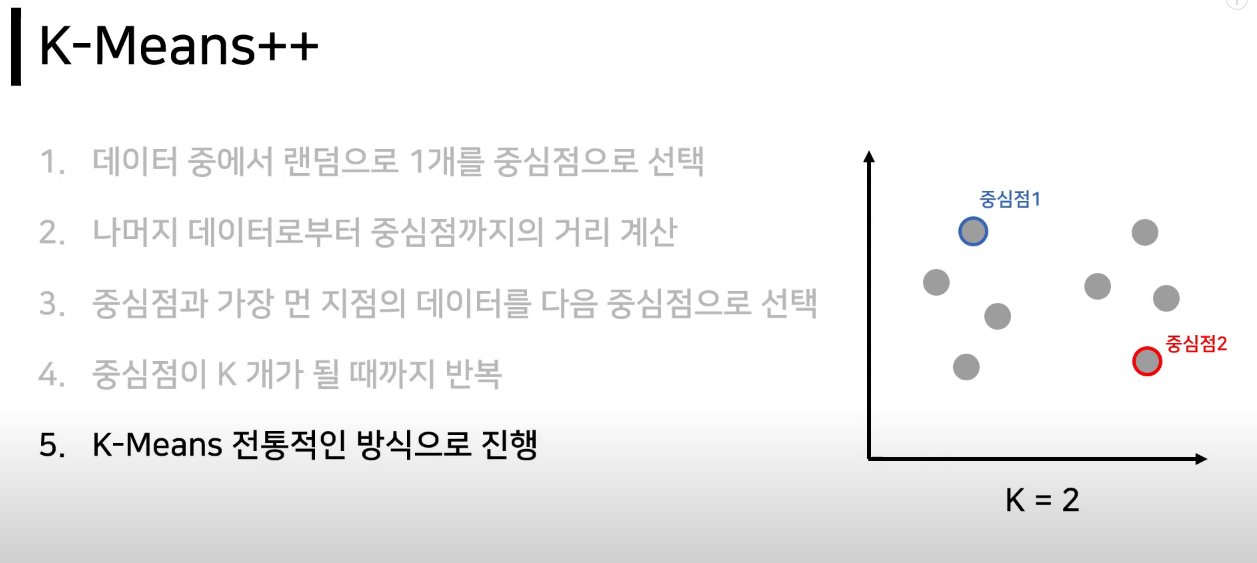

# sklearn은 자동으로 ++방법 사용하게 되어있어서 코드 안건드려도됨!


# 엘보우 방법
optimal K 최적의 K개수는 어케 찾지?

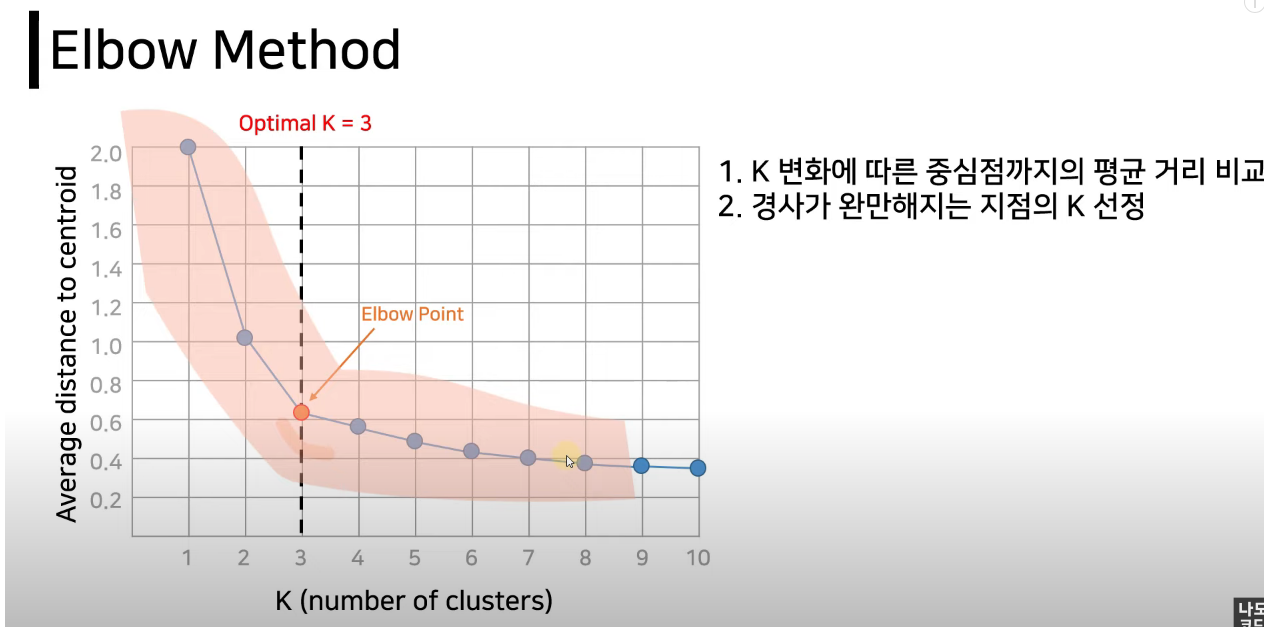

# k-means실습

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dataset = pd.read_csv('/content/KMeansData.csv')
dataset

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79
...,...,...
95,6.21,56
96,7.76,84
97,5.22,87
98,6.65,13


In [ ]:
# 주의! 비지도학습이라 y없음!
X = dataset.iloc[:,:].values
# X = X.dataset.values 해도됨
X

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


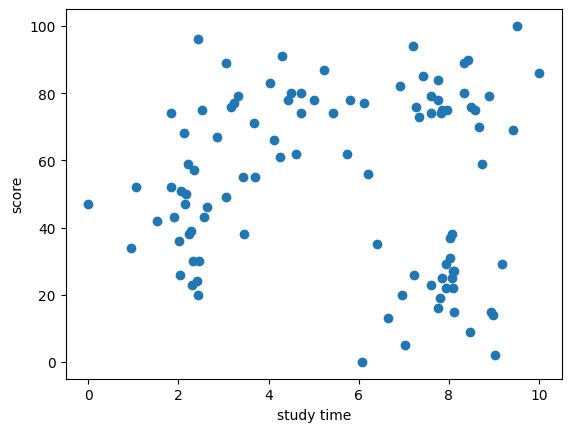

In [ ]:
# 데이터 분포보자!
plt.scatter(X[:,0], X[:,1])
plt.xlabel('study time')
plt.ylabel ('score')
plt.show()

# 주의!! 여기서 눈으로 거리판별하면안됨
X랑 Y축 스케일이 다름.

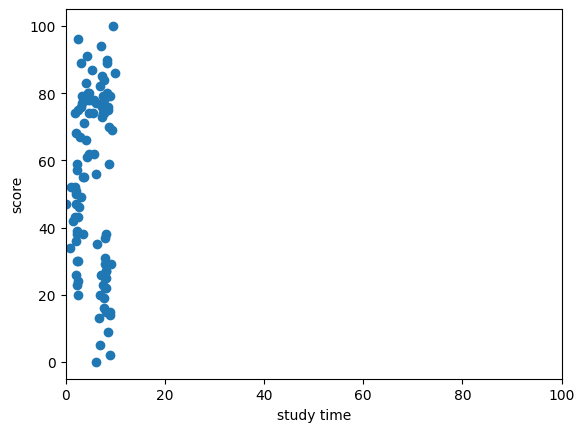

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('study time')
plt.ylabel ('score')
plt.xlim(0,100)
plt.show()

# 실제로 이런그림이었음

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.64615029, -1.07514723],
       [ 0.98282328, -1.49888853],
       [ 0.09251026,  0.31164246],
       [ 1.21101275,  0.19607665],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-1.07088197, -0.30470851],
       [ 0.57133407, -1.88410788],
       [-0.76413547, -0.612884  ],
       [-0.9100271 , -0.18914271],
       [-0.50976032,  0.4657302 ],
       [ 1.37560843, -0.95958142],
       [ 0.79204192,  0.77390569],
       [-1.70307903, -0.76697174],
       [-0.68183762,  0.65833988],
       [ 1.11375166, -1.73002014],
       [-0.98484332,  0.50425214],
       [-1.34396117, -0.42027432],
       [ 0.21969783, -2.07671756],
       [ 1.09504761,  1.39025667],
       [ 0.23466107,  0.8894715 ],
       [-2.05471527, -0.26618658],
       [-1.24670009, -0.15062077],
       [-1.2167736 ,

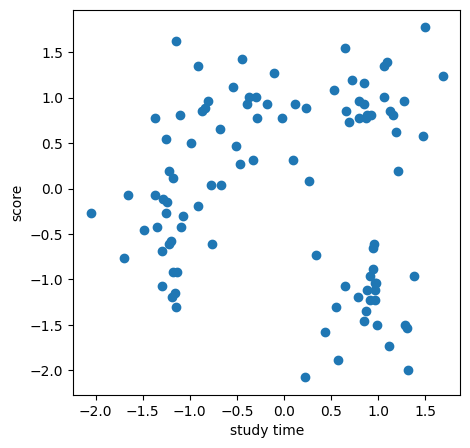

In [ ]:
# 스케일링 된 데이터로 다시 시각화
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('study time')
plt.ylabel ('score')
plt.show()

# 짠 이제는 눈으로 비교하는 거리랑 비슷할거임!

## 1. 엘보우 방식으로 k 찾기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

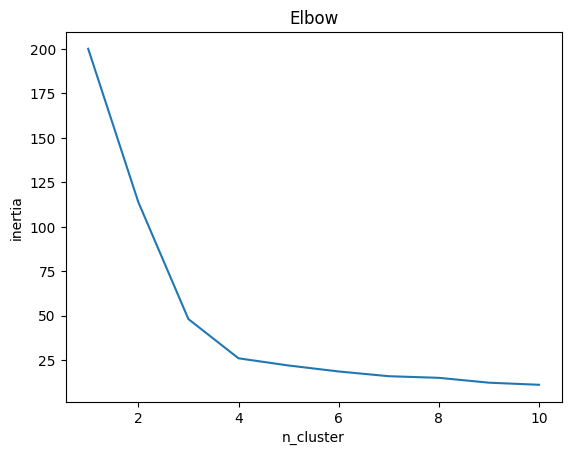

In [ ]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) # 초기에는 k-means++방법 이용하겠따!
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_) # 각 지점으로부터 centoriod 까지의 거리의 제곱의 합

plt.plot(range(1,11), inertia_list)
plt.title('Elbow')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

# 4로 정해야겠다!

In [ ]:
K = 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = K, random_state=0) # init = 'k-means++' 안적어도 default값이라 상관 없음
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X) # 각 데이터들이 어디 군집에 속하는지도 알려줌!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

In [ ]:
# centroid들의 좌표
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

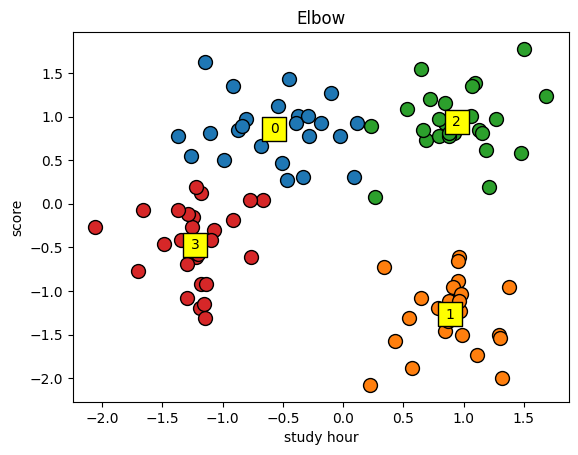

In [ ]:
K = 4
for cluster in range(K):
  plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black')
  plt.scatter(centers[cluster,0], centers[cluster,1], s=300, edgecolor='black', color='yellow', marker='s')
  plt.text(centers[cluster,0], centers[cluster,1], cluster, va='center', ha='center')


plt.title('Elbow')
plt.xlabel('study hour')
plt.ylabel('score')

plt.show()

# 군집화는 잘 됐는데 데이터가 StandardScaler되었어서 시간, 점수를 알아보기 좀 그렇다

In [ ]:
# 스케일링 원복해주기 쉽게 다시 돌릴 수 있음!
X_org = sc.inverse_transform(X)
X_org

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


In [ ]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

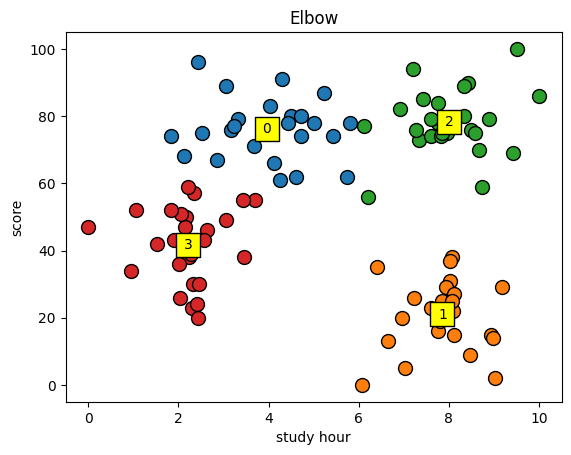

In [ ]:
K = 4
for cluster in range(K):
  plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black')
  plt.scatter(centers_org[cluster,0], centers_org[cluster,1], s=300, edgecolor='black', color='yellow', marker='s')
  plt.text(centers_org[cluster,0], centers_org[cluster,1], cluster, va='center', ha='center')


plt.title('Elbow')
plt.xlabel('study hour')
plt.ylabel('score')

plt.show()

# 해석
0번군집 : 공부시간이 적은데 점수가 높은 애들
1번군집: 공부시간 많은데 점수가 낮은 애들
2번군집 : 공부시간많아서 점수 높다고 볼수있는 애들
3번군집 : 공부시간낮고 점수도 낮은애들

2,3번애들은 정직한 결과